## Assignment 6 – Pandas

 Aviv Yefet   ID:208495267 

In [151]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook (and not in another window)
%matplotlib inline 
from bs4 import BeautifulSoup
import numpy as np
import requests
import string 
import json 
import re
import matplotlib
import matplotlib.pyplot as plt

In [152]:
path = "C:\\Users\\user\\Dropbox\\DS MyNotebooks\\"
fileName = 'LP_destinations.csv'
LP_destinations = pd.read_csv(path+fileName)

In [153]:
LP_destinations

,City,Country,Description
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...
1,Athens,Greece,"With equal measures of grunge and grace, Athen..."
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir..."
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...
...,...,...,...
71,Venice,italy,Imagine the audacity of building a city of mar...
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi..."
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant..."


### Add  "num_of_words" , “No_punct_description” ,“has_restaurants” ,“has_museums”  and “has_beaches”  columns

In [155]:
def num_of_words(description): 
    description = description.split()
    return len(description)

In [156]:
 LP_destinations["num_of_words"] = LP_destinations["Description"].apply(num_of_words)

In [157]:
def No_punct_description(description): 
    description = re.sub(r'[^\w\s]', '',description)
    description = description.replace("\n", " ") 
    return description
    

In [158]:
 LP_destinations["No_punct_description"] = LP_destinations["Description"].apply(No_punct_description)

In [160]:
def has_restaurants(no_punck_description):
    counter=0
    desc_lst = no_punck_description.split()
    for word in desc_lst:
        if word.lower() =='restaurant':
            counter = counter + 1
    return counter
     

In [161]:
 LP_destinations['has_restaurants'] = LP_destinations['No_punct_description'].apply(has_restaurants)

In [162]:
def has_museums(no_punck_description):
    counter=0
    desc_lst = no_punck_description.split()
    for word in desc_lst:
        if word.lower() =='museum':
            counter = counter + 1
    return counter
     

In [163]:
 LP_destinations['has_museums'] = LP_destinations['No_punct_description'].apply(has_museums)

In [164]:
def has_beaches(no_punct_description):
    counter=0
    desc_lst = no_punct_description.split()
    for word in desc_lst:
        if word.lower() =='beach' or  word.lower()=='ocean' or word.lower()=='sea':
            counter = counter + 1
    return counter

In [165]:
 LP_destinations['has_beaches'] = LP_destinations['No_punct_description'].apply(has_beaches)

In [166]:
 LP_destinations

,City,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,Once seen simply as the gateway to the Turkish...,112,Once seen simply as the gateway to the Turkish...,0,0,0
1,Athens,Greece,"With equal measures of grunge and grace, Athen...",393,With equal measures of grunge and grace Athens...,1,0,0
2,Ayia-napa,Cyprus,Endless blue-sky days and a coastline riddled ...,147,Endless bluesky days and a coastline riddled w...,0,0,1
3,Bangkok,Thailand,"Same same, but different. This Thailish T-shir...",398,Same same but different This Thailish Tshirt p...,0,0,0
4,Barcelona,Spain,Barcelona is an enchanting seaside city with b...,427,Barcelona is an enchanting seaside city with b...,0,0,1
...,...,...,...,...,...,...,...,...
71,Venice,italy,Imagine the audacity of building a city of mar...,420,Imagine the audacity of building a city of mar...,0,0,0
72,Vienna,Austria,Baroque streetscapes and imperial palaces set ...,418,Baroque streetscapes and imperial palaces set ...,0,5,0
73,Warsaw,Poland,"A phoenix arisen from the ashes, Poland's capi...",406,A phoenix arisen from the ashes Polands capita...,0,5,0
74,Zakynthos,Greece,"Zakynthos, also known by its Italian name Zant...",118,Zakynthos also known by its Italian name Zante...,0,0,0


### Average number of words in the description coulmn:

In [167]:
# first we calculate the number of wornds in No_punck_description coulmn, in order to get the "real" words in the description
def num_of_words_no_punct(no_punck_description): 
    no_punck_description = no_punck_description.split()
    return len(no_punck_description)

In [168]:
 LP_destinations['No_punct_words'] = LP_destinations['No_punct_description'].apply(num_of_words_no_punct)

In [169]:
 LP_destinations['No_punct_words'].mean() #the avg number of words in the desscription culms

273.6578947368421

### The city with the longest description 

In [144]:
 LP_destinations['No_punct_words'].max()

522

In [146]:
LP_destinations['City'].iloc[np.where(LP_destinations['No_punct_words']==522)]

28    Florence
Name: City, dtype: object

In [147]:
LP_destinations[LP_destinations['City']=='Florence']

,City,Country,Description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches,no_punct_words,No_punct_words
28,Florence,italy,"Cradle of the Renaissance, romantic, enchantin...",526,Cradle of the Renaissance romantic enchanting ...,0,0,1,522,522


### Data visualization 

Text(0.5, 1.0, 'example histogram')

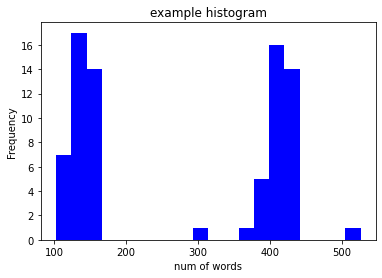

In [170]:
#histogram of the column “num_of_words”

x =  LP_destinations['num_of_words']
plt.hist(x, bins=20 ,color='b')

plt.xlabel("num of words")
plt.ylabel("Frequency")
plt.title("example histogram")

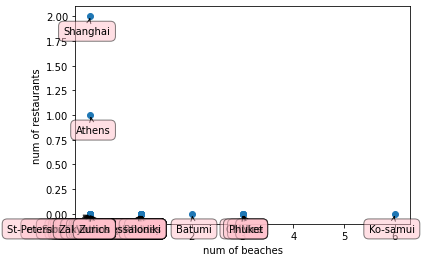

In [149]:
# A scatter plot that shows the relationship between number of beaches and number of restaurants. 

x =  LP_destinations['has_beaches']
y =  LP_destinations['has_restaurants']

plt.scatter(x, y)

plt.xlabel('num of beaches')
plt.ylabel('num of restaurants')


for label, x, y in zip(LP_destinations['City'], x, y):
    plt.annotate(  # adding annotation to the diagram
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'pink', alpha = 0.5), 
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
    
plt.show()

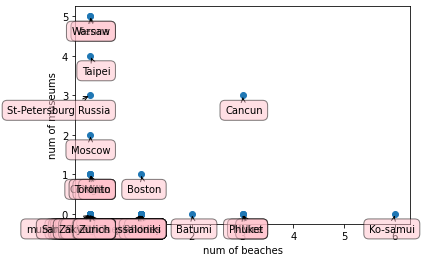

In [150]:
#A scatter plot that shows the relationship between number of museums and the number of beaches

x =  LP_destinations['has_beaches']
y =  LP_destinations['has_museums']

plt.scatter(x, y)

plt.xlabel('num of beaches')
plt.ylabel('num of museums')


for label, x, y in zip(LP_destinations['City'], x, y):
    plt.annotate(  # adding annotation to the diagram
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'pink', alpha = 0.5), # alpha - the intensity of the color
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
    
plt.show()